## 2. Task

Here, we use the [heart disease](./heart.csv) dataset. Each sample has the following feature:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The last column refers to the presence of heart disease in the patient.

The task is to predict whether a person has the heart disease.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
age


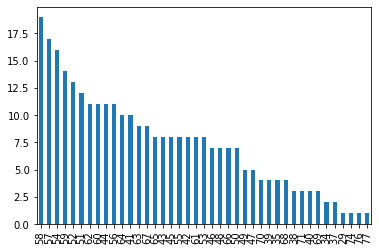

sex


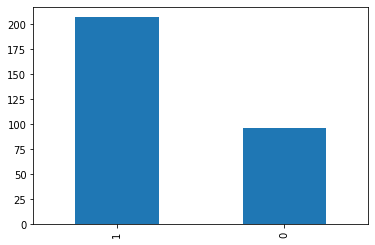

cp


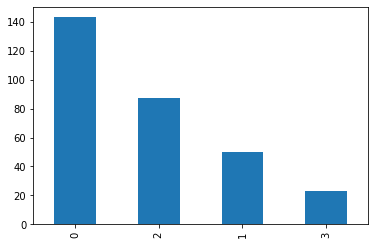

trestbps


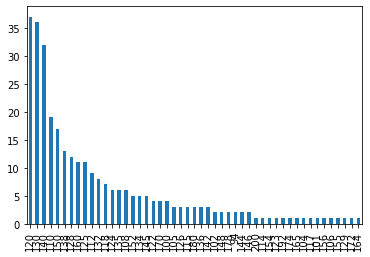

chol


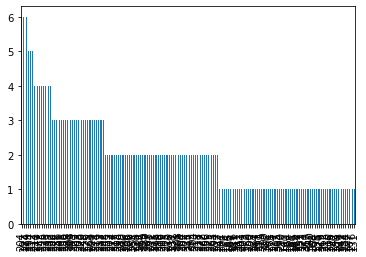

fbs


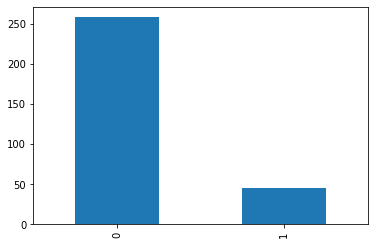

restecg


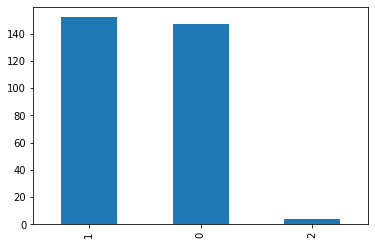

thalach


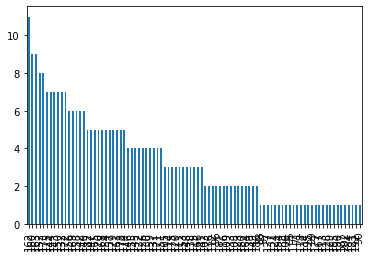

exang


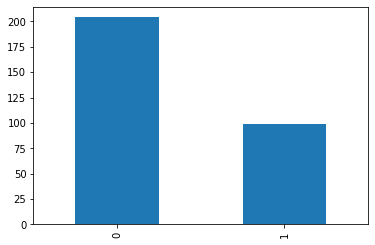

oldpeak


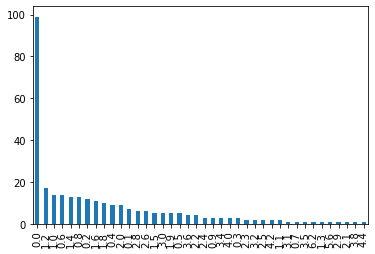

slope


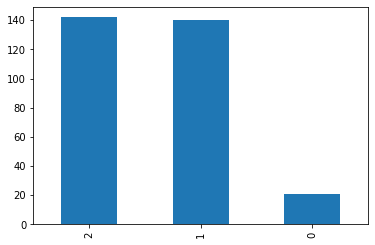

ca


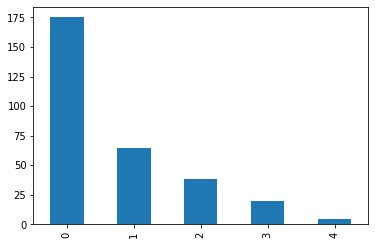

thal


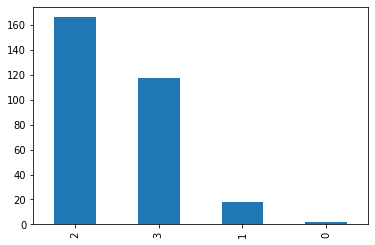

target


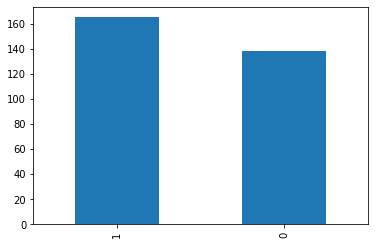

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import matplotlib.pyplot as plt
import random
random.seed(123)

dataFrame = pd.read_csv('heart.csv')

print(dataFrame.isnull().sum())
#none of our data fields have null values inside of them
print(dataFrame.info())
#Since none of our data fields are categorical, we do not need to consider encoding for any of the fields.

for eachLabel in dataFrame.columns.values:
    dataFrame[eachLabel].value_counts().plot(kind= 'bar')
    print(eachLabel)
    plt.show()

# print(dataFrame.shape())
#we have a few unbalanced data fields, such as sex(which is mostly 1's [I assume for men]) fbs, restecg, exang, oldpeak, slope, ca, and thal



In [6]:
print(dataFrame.shape)
targetField = dataFrame['target'].values
features = dataFrame.drop('target', axis = 1).values


X_train, X_test, y_train, y_test = train_test_split(features,targetField,test_size = 0.1086, random_state = 1)

print("train_val: {}, test: {}".format(X_train.shape, X_test.shape))

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)


(303, 14)
train_val: (270, 13), test: (33, 13)


In [7]:
folds = 10

num_train_val = X_train.shape[0]
#print(num_train_val)


index_of_samples = np.arange(num_train_val)
#print(index_of_samples)
shuffle(index_of_samples)
#print(index_of_samples)
#print("Index of samples")
#print(index_of_samples)

foldIndex = index_of_samples.reshape(folds, -1)
#print("index of folds")
#print(index_of_folds)

coefficients = [100,50,20,10,1,0.1,0.01,0.001,0.0001,0.00001]

bestACC = 0.0
bestREG = 0.0

for regCoef in coefficients:
    sumACC = 0.0

    for eachFold in range(folds):
        foldIndexTemp = foldIndex.copy()

        valid_index = foldIndexTemp[eachFold,:].reshape(-1) #get the index of the validation set
        # print("validation index")
        # print(valid_index)
        # validation set
        # print(X_train.shape)
        X_Valid = X_train[valid_index]

        y_Valid = y_train[valid_index]

        train_index = np.delete(foldIndexTemp, eachFold, 0).reshape(-1) #get the index of the training set
        # print("train index")
        # print(train_index)

        # training set
        # print(X_train.shape)
        # print(train_index)
        X_Train = X_train[train_index]
        y_Train = y_train[train_index]

        # build the model with different hyperparameters
        clf = LogisticRegression(penalty='l2', C=regCoef, solver='lbfgs', max_iter=10000000)

        #train the model with the training set
        clf.fit(X_Train, y_Train)

        y_valid_pred = clf.predict(X_Valid)
        acc = accuracy_score(y_Valid, y_valid_pred)

        sumACC += acc

    cur_acc = sumACC / folds

    print("reg_coeff: {}, acc: {:.3f}".format(regCoef, cur_acc))

    # store the best hyperparameter
    if cur_acc > bestACC:
        bestACC = cur_acc
        bestREG = regCoef

print("best reg coeff: {}, best acc: {:.3f}".format(1.0/bestREG, bestACC))



reg_coeff: 100, acc: 0.811
reg_coeff: 50, acc: 0.811
reg_coeff: 20, acc: 0.811
reg_coeff: 10, acc: 0.811
reg_coeff: 1, acc: 0.811
reg_coeff: 0.1, acc: 0.819
reg_coeff: 0.01, acc: 0.811
reg_coeff: 0.001, acc: 0.704
reg_coeff: 0.0001, acc: 0.548
reg_coeff: 1e-05, acc: 0.548
best reg coeff: 10.0, best acc: 0.819


In [8]:
# retrain the model
clf = LogisticRegression(penalty='l2', C=bestREG, solver='lbfgs',max_iter=10000000)
clf.fit(X_train, y_train)

# evaluate the model on the testing set
y_test_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)


print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))
print("bias is "+str(clf.intercept_))
print("coefficients  is "+str(clf.coef_))

accuracy: 0.909, recall: 1.000, precision: 0.850, f1: 0.919,
bias is [0.20056674]
coefficients  is [[-0.05533337 -0.59188244  0.65994139 -0.19787293 -0.10636526  0.04100898
   0.14725779  0.40066272 -0.39389134 -0.45199311  0.27287573 -0.50784884
  -0.39053398]]
